In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

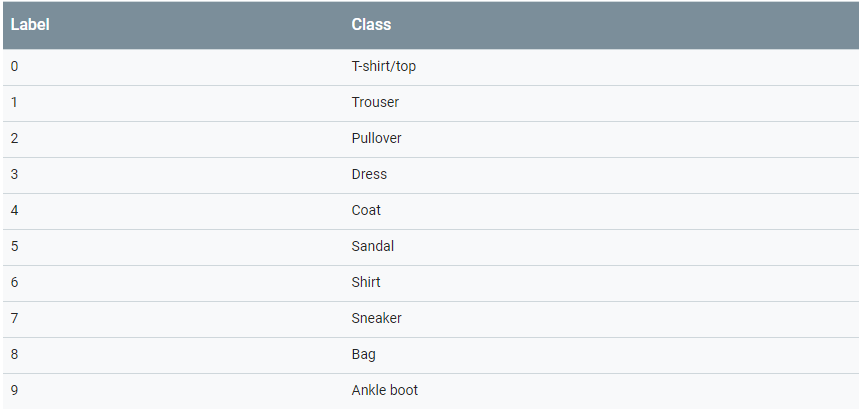

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


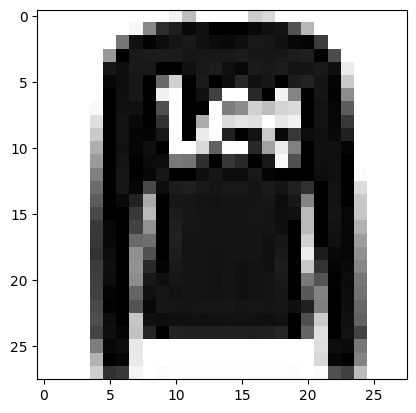

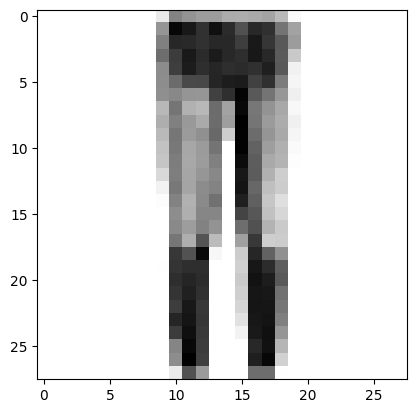

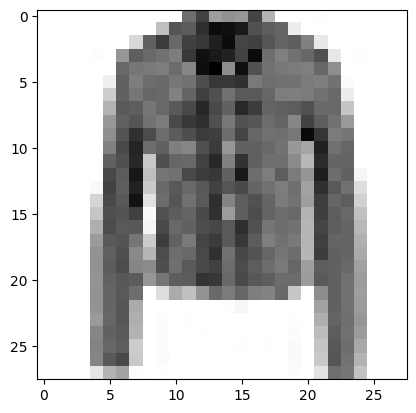

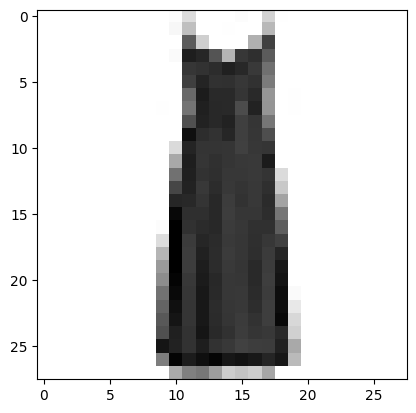

In [3]:
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
plt.imshow(test_X[3].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
plt.imshow(test_X[10].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
plt.imshow(test_X[13].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [4]:
train_Y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [7]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',metrics=['accuracy'])


Epoch 1/5
938/938 [==============================] - 76s 80ms/step - loss: 0.4659 - accuracy: 0.8308
Epoch 2/5
938/938 [==============================] - 72s 77ms/step - loss: 0.3127 - accuracy: 0.8865
Epoch 3/5
938/938 [==============================] - 73s 78ms/step - loss: 0.2750 - accuracy: 0.9002
Epoch 4/5
938/938 [==============================] - 69s 74ms/step - loss: 0.2461 - accuracy: 0.9109
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.2730 - accuracy: 0.9001
Test loss 0.2729935348033905
Test accuracy 0.9000999927520752
313/313 [==============================] - 3s 10ms/step
9


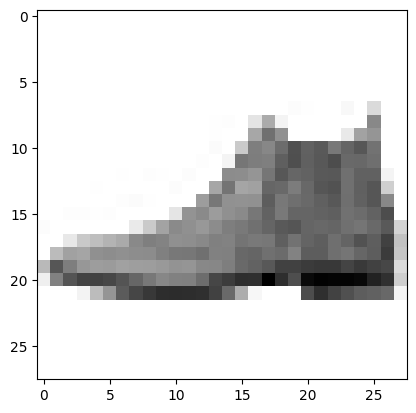

In [8]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)#, validation_data = (test_X, test_Y_one_hot))

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

313/313 [==============================] - 4s 13ms/step - loss: 0.3361 - accuracy: 0.8858
Test loss 0.33608463406562805
Test accuracy 0.8858000040054321
9


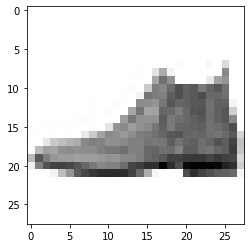

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()